In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [25]:
df = pd.read_csv(r"E:\PGDA 41\ALL COMPLETE ASSIGNMENT\Machine Learning\Clustering Project\mall_customer_app_usage.csv")

In [27]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Avg Daily App Usage (mins),Mall Visits Per Week,In-Store Dwell Time (mins)
0,1,Male,49,61,9,50,4,28
1,2,Female,56,76,71,48,4,35
2,3,Male,49,115,28,46,2,47
3,4,Male,21,52,78,49,3,37
4,5,Male,47,95,95,65,3,51


In [29]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [31]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)',
            'Avg Daily App Usage (mins)', 'Mall Visits Per Week',
            'In-Store Dwell Time (mins)']

In [33]:
X = df[features]

In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [37]:
inertia = []
K = range(1, 11)

In [39]:
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

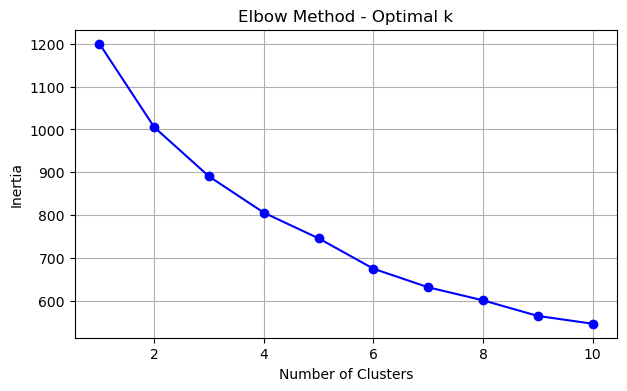

In [21]:
plt.figure(figsize=(7, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method - Optimal k')
plt.grid(True)
plt.show()

In [41]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

In [43]:
df['Cluster'] = clusters

In [45]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

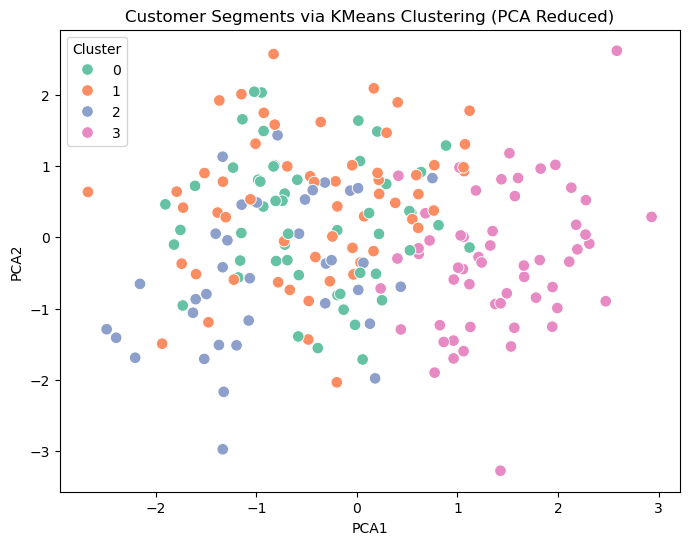

In [47]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=70)
plt.title('Customer Segments via KMeans Clustering (PCA Reduced)')
plt.show()

In [49]:
cluster_summary = df.groupby('Cluster')[features].mean().round(2)
print("📋 Cluster-wise Customer Averages:\n")
print(cluster_summary)

📋 Cluster-wise Customer Averages:

           Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                      
0        49.37               60.96                   69.10   
1        27.19               68.98                   45.23   
2        44.92               55.00                   39.00   
3        41.54               99.96                   39.07   

         Avg Daily App Usage (mins)  Mall Visits Per Week  \
Cluster                                                     
0                             59.78                  4.73   
1                             64.05                  5.40   
2                             74.97                  2.78   
3                             48.14                  2.73   

         In-Store Dwell Time (mins)  
Cluster                              
0                             49.59  
1                             45.33  
2                             36.83  
3                             46.11

In [51]:
df.to_csv("mall_customer_clustered.csv", index=False)